# Question one : Explore the dataset


In [1]:
# import libraries

import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import warnings

In [2]:
# load data
df = pd.read_excel("E:\Datasets\Datasciencecycle\week4_datsets\Cassava_Yield_Data.xlsx")
df.head(10)

,Sesn,locn,block,rep,tillage,ferT,Plants_harvested,No_bigtubers,Weigh_bigtubers,No_mediumtubers,Weight_mediumtubers,No_smalltubers,Weight_smalltubers,Totaltuberno,AV_tubers_Plant,Total_tubweight,plotsize,HEC,TotalWeightperhectare,TotalTuberperHectare
0,2,1,1,1,conv,F2150,28,0,0.0,61,2.5,319,4.7,380,13.571429,7.2,5.3,10000,13584.905660,716981.132075
1,2,1,1,1,conv,F1100,28,0,0.0,110,4.6,260,4.0,370,13.214286,8.6,5.3,10000,16226.415094,698113.207547
2,2,1,1,1,conv,F3200,28,2,0.2,115,5.2,319,4.4,436,15.571429,9.8,5.3,10000,18490.566038,822641.509434
3,2,1,1,1,conv,F5300,28,6,0.7,60,2.7,303,4.8,369,13.178571,8.2,5.3,10000,15471.698113,696226.415094
4,2,1,1,1,conv,F4250,28,3,0.3,82,3.4,332,4.7,417,14.892857,8.4,5.3,10000,15849.056604,786792.452830
5,2,1,2,2,conv,F5300,28,6,0.5,65,2.7,299,4.5,370,13.214286,7.7,5.3,10000,14528.301887,698113.207547
6,2,1,2,2,conv,F3200,28,0,0.0,91,3.9,289,4.8,380,13.571429,8.7,5.3,10000,16415.094340,716981.132075
7,2,1,2,2,conv,F4250,28,0,0.0,72,3.5,246,4.6,318,11.357143,8.1,5.3,10000,15283.018868,600000.000000
8,2,1,2,2,conv,F1100,28,1,0.2,64,2.6,305,5.4,370,13.214286,8.2,5.3,10000,15471.698113,698113.207547
9,2,1,2,2,conv,F2150,28,1,0.1,56,2.5,308,4.5,365,13.035714,7.1,5.3,10000,13396.226415,688679.245283


In [3]:
## descriptive statistics
df.describe()

,Sesn,locn,block,rep,Plants_harvested,No_bigtubers,Weigh_bigtubers,No_mediumtubers,Weight_mediumtubers,No_smalltubers,Weight_smalltubers,Totaltuberno,AV_tubers_Plant,Total_tubweight,plotsize,HEC,TotalWeightperhectare,TotalTuberperHectare
count,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.0,115.000000,115.000000
mean,1.521739,1.521739,2.043478,2.043478,18.565217,4.000000,0.614783,49.521739,2.771304,146.252174,2.511304,199.773913,10.525355,5.897391,4.486957,10000.0,13094.339623,431822.336810
std,0.501713,0.501713,0.809931,0.809931,6.442908,7.367544,1.174678,29.920757,1.774911,87.351663,1.303354,102.555168,3.248495,3.040702,0.485134,0.0,6896.716668,184839.313619
min,1.000000,1.000000,1.000000,1.000000,5.000000,0.000000,0.000000,0.000000,0.000000,37.000000,0.500000,57.000000,3.800000,1.000000,4.200000,10000.0,2380.952381,135714.285714
25%,1.000000,1.000000,1.000000,1.000000,14.000000,0.000000,0.000000,26.500000,1.300000,84.000000,1.500000,115.500000,8.027778,3.400000,4.200000,10000.0,8095.238095,275000.000000
50%,2.000000,2.000000,2.000000,2.000000,18.000000,0.000000,0.000000,44.000000,2.500000,109.000000,2.100000,179.000000,10.666667,6.000000,4.200000,10000.0,11904.761905,419047.619048
75%,2.000000,2.000000,3.000000,3.000000,28.000000,5.500000,0.700000,65.500000,3.950000,221.000000,3.600000,273.500000,12.973684,8.150000,5.300000,10000.0,16421.832884,589285.714286
max,2.000000,2.000000,3.000000,3.000000,28.000000,41.000000,7.000000,126.000000,8.100000,376.000000,5.400000,443.000000,19.200000,14.100000,5.300000,10000.0,33571.428571,835849.056604


In [4]:
# missing data
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Sesn                   115 non-null    int64  
 1   locn                   115 non-null    int64  
 2   block                  115 non-null    int64  
 3   rep                    115 non-null    int64  
 4   tillage                115 non-null    object 
 5   ferT                   115 non-null    object 
 6   Plants_harvested       115 non-null    int64  
 7   No_bigtubers           115 non-null    int64  
 8   Weigh_bigtubers        115 non-null    float64
 9   No_mediumtubers        115 non-null    int64  
 10  Weight_mediumtubers    115 non-null    float64
 11  No_smalltubers         115 non-null    int64  
 12  Weight_smalltubers     115 non-null    float64
 13  Totaltuberno           115 non-null    int64  
 14  AV_tubers_Plant        115 non-null    float64
 15  Total_

In [5]:
# missing data
missing_data = df.isnull().sum()
missing_data

Sesn                     0
locn                     0
block                    0
rep                      0
tillage                  0
ferT                     0
Plants_harvested         0
No_bigtubers             0
Weigh_bigtubers          0
No_mediumtubers          0
Weight_mediumtubers      0
No_smalltubers           0
Weight_smalltubers       0
Totaltuberno             0
AV_tubers_Plant          0
Total_tubweight          0
plotsize                 0
HEC                      0
TotalWeightperhectare    0
TotalTuberperHectare     0
dtype: int64

# There are no missing values

In [6]:
# # variable distribution
categorical_col = ["Sesn","locn","block","rep","tillage","ferT"]
continuous_col = ["Plants_harvested","No_bigtubers","Weigh_bigtubers","No_mediumtubers","Weight_mediumtubers","No_smalltubers","Weight_smalltubers","Totaltuberno","AV_tubers_Plant","Total_tubweight","TotalWeightperhectare","TotalTuberperHectare"]


C:\ProgramData\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is

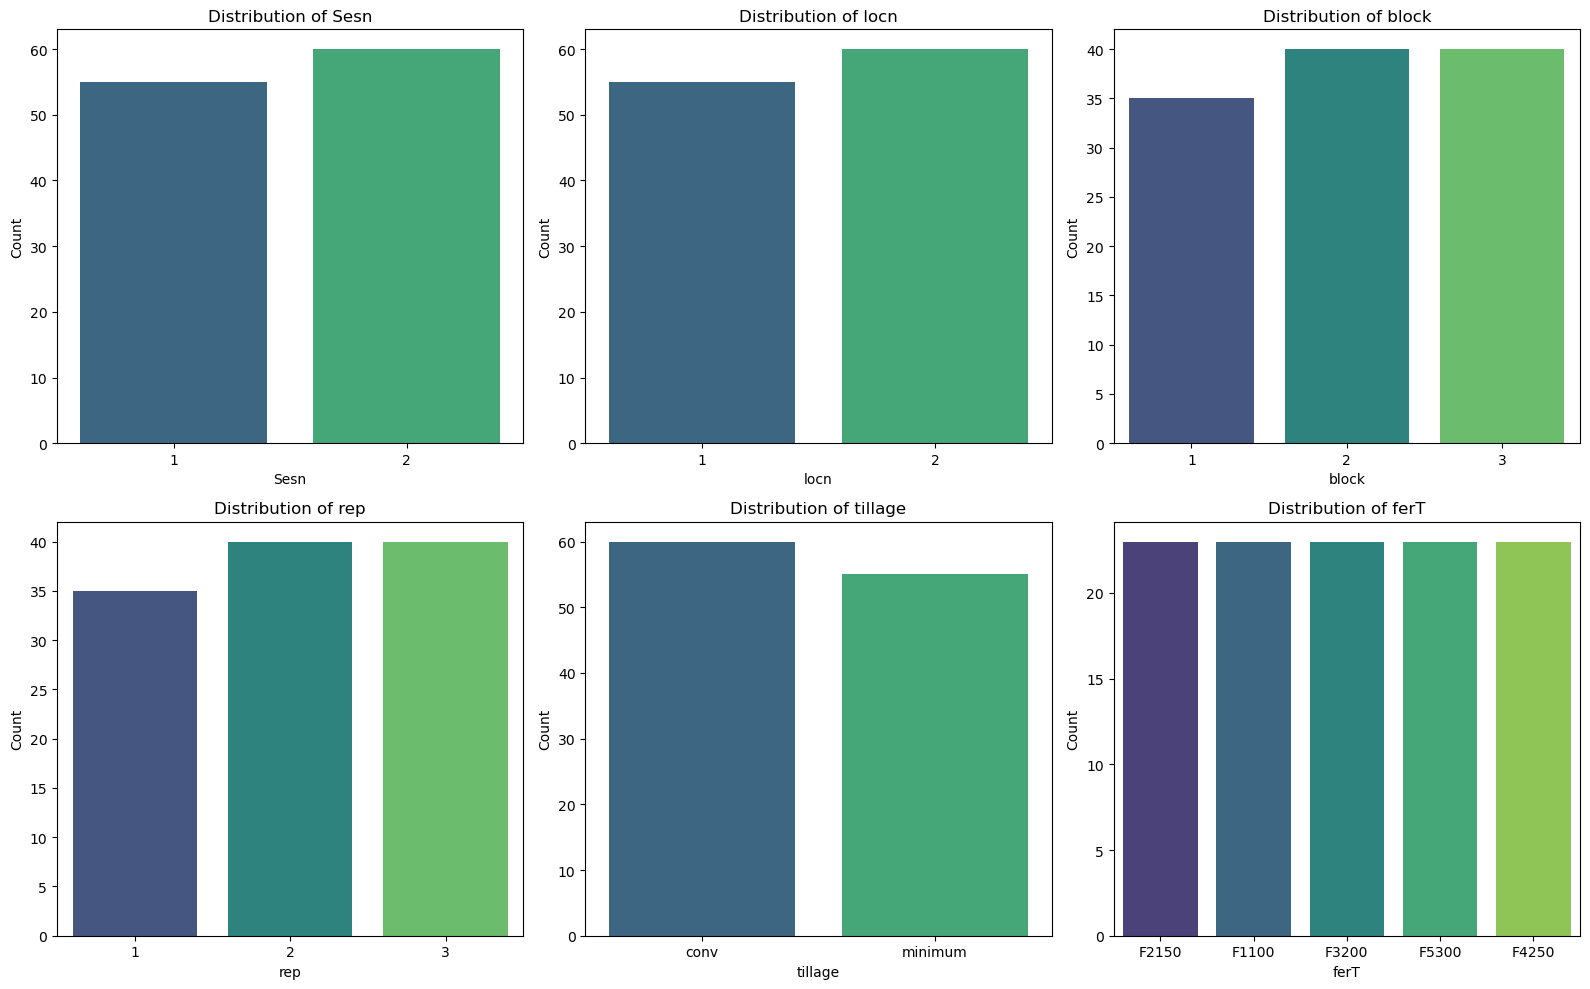

In [7]:
# plot categorical columns
df.columns = df.columns.str.strip() # data clean to remove extra space
plt.figure(figsize=(16, 10))
for i, col in enumerate(categorical_col, 1):
    plt.subplot(2, 3, i)
    if col in df.columns:
        
        sns.countplot(x=df[col], palette='viridis')  
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Count')
    else:
        plt.text(0.5, 0.5, f"Column '{col}' not found", 
                 horizontalalignment='center', verticalalignment='center')
plt.tight_layout()

# the plots show that the number of conv and minimum tillage plots is almost equal 

C:\ProgramData\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


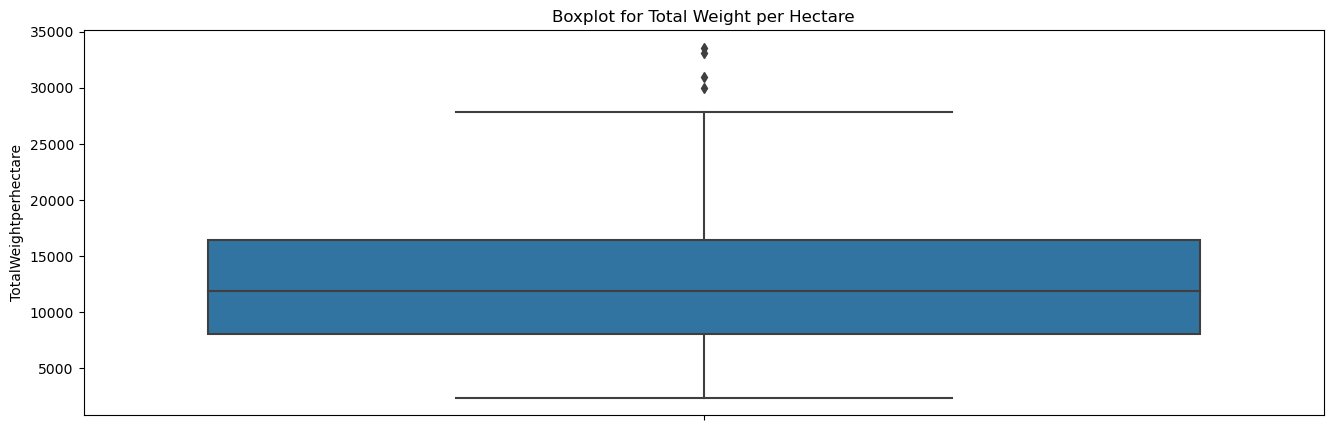

In [8]:
# plot continuous columns like Total weight per hectare and Total Tuber per hectare
fig, (ax1) = plt.subplots(1, figsize=(16, 5))

# Create separate boxplots for each column on different axes
sns.boxplot(y=df['TotalWeightperhectare'], ax=ax1)

# Set titles for each subplot
ax1.set_title("Boxplot for Total Weight per Hectare")

plt.show()
# plot shows there are outliers

### How to handle outliers

In [9]:
# use capping to handle outliers

continuous_col = ["Plants_harvested","No_bigtubers","Weigh_bigtubers","No_mediumtubers","Weight_mediumtubers","No_smalltubers","Weight_smalltubers","Totaltuberno","AV_tubers_Plant","Total_tubweight","TotalWeightperhectare","TotalTuberperHectare"]
df_transformed = df.copy()
# Loop through each column and cap the outliers
for col in continuous_col:
    # Find the 5% and 95% values
    lower_limit = df_transformed[col].quantile(0.05)
    upper_limit = df_transformed[col].quantile(0.95)
    
    # Replace any value lower than the limit with the limit(5%)
    # and any value higher than the limit with the limit(95%)
    df_transformed[col] = np.clip(df_transformed[col], lower_limit, upper_limit)

print("Outliers have been capped!")
## use capping to handle outliers usng the 5% and the 95% percentiles.

Outliers have been capped!


In [10]:
# skewed columns
skewness = df_transformed[continuous_col].skew()
skewness

Plants_harvested         0.419242
No_bigtubers             1.639178
Weigh_bigtubers          1.722165
No_mediumtubers          0.559171
Weight_mediumtubers      0.619261
No_smalltubers           0.763042
Weight_smalltubers       0.572560
Totaltuberno             0.465095
AV_tubers_Plant         -0.110646
Total_tubweight          0.148600
TotalWeightperhectare    0.493116
TotalTuberperHectare     0.105790
dtype: float64

In [11]:
# handling skewed data like TotalWeightperhectare
skewness = df_transformed[continuous_col].skew()
highly_skewed_col = skewness[abs(skewness) > 0.75].index.tolist()

print("These columns are still skewed:", highly_skewed_col)

# handle the columns still skewd by applying log transformation
for col in highly_skewed_col:
    df_transformed[col + '_log'] = np.log1p(df_transformed[col])
print("Skewed data has been Transformed")    

These columns are still skewed: ['No_bigtubers', 'Weigh_bigtubers', 'No_smalltubers']
Skewed data has been Transformed


C:\ProgramData\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


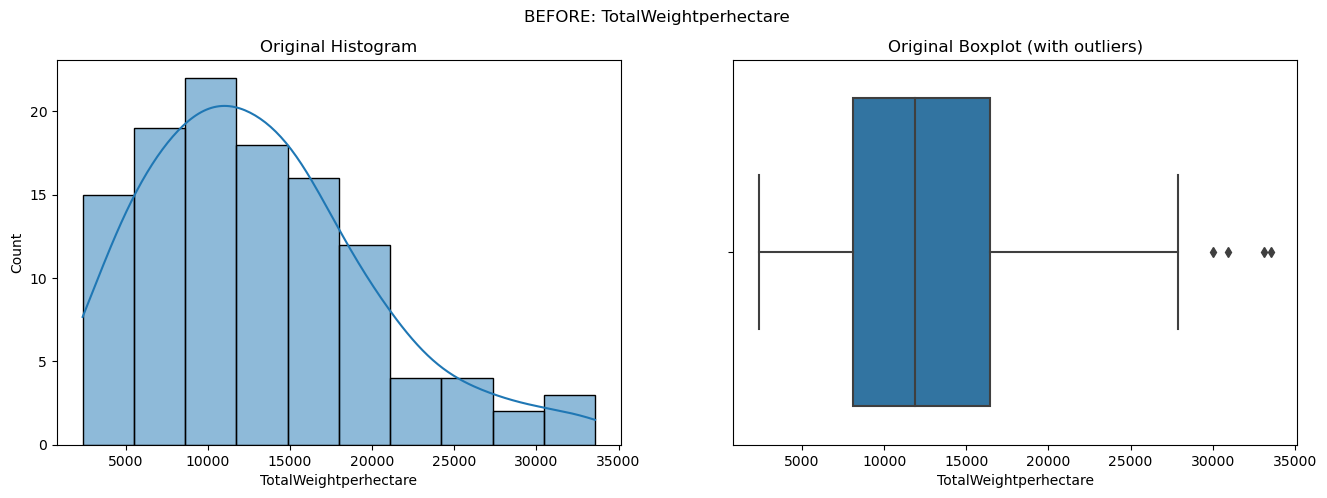

In [12]:
# before transformaion 
fig, axes = plt.subplots(1, 2, figsize=(16, 5))
sns.histplot(df['TotalWeightperhectare'], kde=True, ax=axes[0])
axes[0].set_title('Original Histogram')
sns.boxplot(x=df['TotalWeightperhectare'], ax=axes[1])
axes[1].set_title('Original Boxplot (with outliers)')
plt.suptitle('BEFORE: TotalWeightperhectare')
plt.show()

C:\ProgramData\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


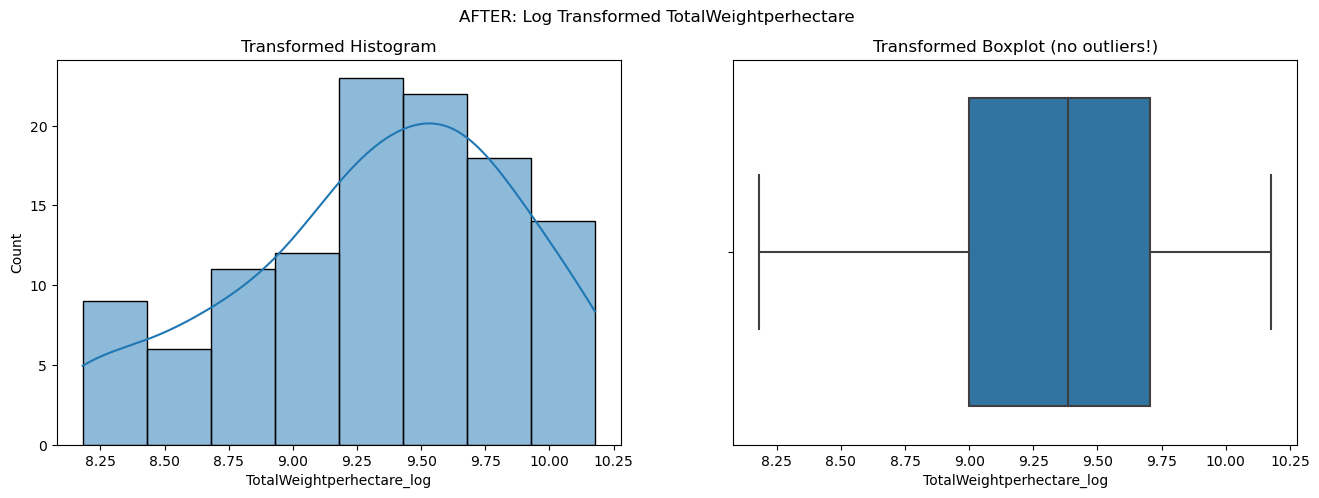

In [13]:
# after transformation
fig, axes = plt.subplots(1, 2, figsize=(16, 5))
df_transformed['TotalWeightperhectare_log'] = np.log(df_transformed['TotalWeightperhectare'] + 1)  # Adding 1 to handle zeros

sns.histplot(df_transformed['TotalWeightperhectare_log'], kde=True, ax=axes[0])
axes[0].set_title('Transformed Histogram')
sns.boxplot(x=df_transformed['TotalWeightperhectare_log'], ax=axes[1])
axes[1].set_title('Transformed Boxplot (no outliers!)')
plt.suptitle('AFTER: Log Transformed TotalWeightperhectare')
plt.show()

# Question two : Relationships

In [14]:
df = df_transformed
df.head()

,Sesn,locn,block,rep,tillage,ferT,Plants_harvested,No_bigtubers,Weigh_bigtubers,No_mediumtubers,...,AV_tubers_Plant,Total_tubweight,plotsize,HEC,TotalWeightperhectare,TotalTuberperHectare,No_bigtubers_log,Weigh_bigtubers_log,No_smalltubers_log,TotalWeightperhectare_log
0,2,1,1,1,conv,F2150,28.0,0.0,0.0,61.0,...,13.571429,7.2,5.3,10000,13584.905660,716981.132075,0.000000,0.000000,5.726522,9.516788
1,2,1,1,1,conv,F1100,28.0,0.0,0.0,105.2,...,13.214286,8.6,5.3,10000,16226.415094,698113.207547,0.000000,0.000000,5.564520,9.694457
2,2,1,1,1,conv,F3200,28.0,2.0,0.2,105.2,...,15.571429,9.8,5.3,10000,18490.566038,716981.132075,1.098612,0.182322,5.726522,9.825070
3,2,1,1,1,conv,F5300,28.0,6.0,0.7,60.0,...,13.178571,8.2,5.3,10000,15471.698113,696226.415094,1.945910,0.530628,5.717028,9.646832
4,2,1,1,1,conv,F4250,28.0,3.0,0.3,82.0,...,14.892857,8.4,5.3,10000,15849.056604,716981.132075,1.386294,0.262364,5.726522,9.670928


# Relationship between 2 continuous variables

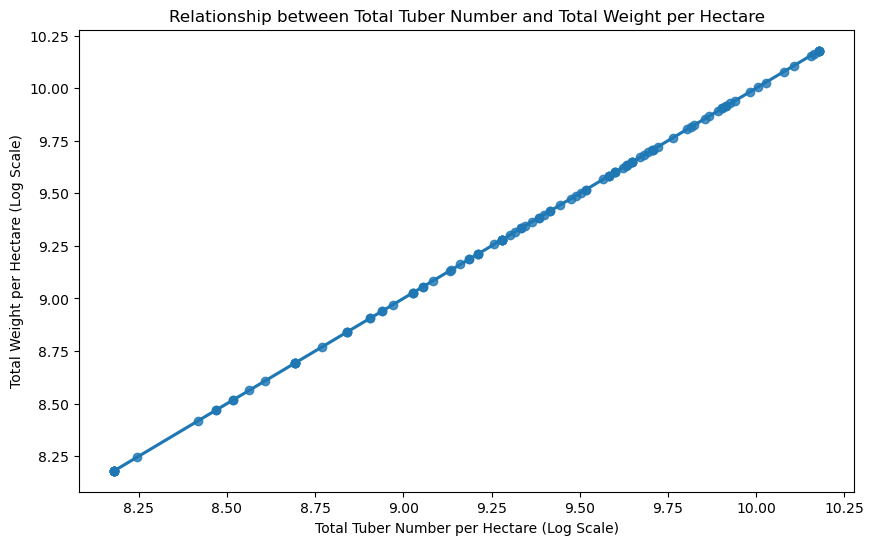

In [15]:
# TotalTuberperHectare and 	TotalWeightperhectare
# Graphically 

columns = ["TotalTuberperHectare" , "TotalWeightperhectare"]

df_transformed['TotalTuberperHectare_log'] = np.log(df_transformed['TotalTuberperHectare'])
df_transformed['TotalWeightperhectare_log'] = np.log(df_transformed['TotalWeightperhectare'] + 1) 

plt.figure(figsize=(10, 6))

sns.regplot(x=df_transformed['TotalWeightperhectare_log'], y='TotalWeightperhectare_log', data=df_transformed)
plt.title('Relationship between Total Tuber Number and Total Weight per Hectare')
plt.xlabel('Total Tuber Number per Hectare (Log Scale)')
plt.ylabel('Total Weight per Hectare (Log Scale)')
plt.show()

In [16]:
# Pearson correlation coefficient
df = df_transformed
continuous_col = ['TotalWeightperhectare', 'TotalTuberperHectare']
# transformed columns
for col in continuous_col:
    lower_limit = df_transformed[col].quantile(0.05)
    upper_limit = df_transformed[col].quantile(0.95)
    df_transformed[col] = np.clip(df_transformed[col], lower_limit, upper_limit)
    df_transformed[col + '_log'] = np.log1p(df_transformed[col])

# Then calculate correlation after all columns are created
correlation_coefficient, p_value = stats.pearsonr(df_transformed['TotalTuberperHectare_log'], 
                                                 df_transformed['TotalWeightperhectare_log'])

print("--- Pearson's Correlation Test ---")
print(f"Correlation Coefficient: {correlation_coefficient:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    print("\nConclusion: The relationship is statistically significant.")
    if correlation_coefficient > 0.7:
        print("There is a strong positive linear relationship between the number of tubers and their total weight.")
    elif correlation_coefficient > 0.3:
        print("There is a moderate positive linear relationship.")
    else:
        print("There is a weak positive linear relationship.")
else:
    print("\nConclusion: The relationship is not statistically significant.")

--- Pearson's Correlation Test ---
Correlation Coefficient: 0.7029
P-value: 0.0000

Conclusion: The relationship is statistically significant.
There is a strong positive linear relationship between the number of tubers and their total weight.


## Interpretation
As the number of tubers increases, the total weight also increases.The correlation coefficient is close to 1 and the p_value is extremely small which comfirms there is a very strong statistically significant positive linear relationship between the two variables

# Relationship between One continuous and One Categorical Variable.

C:\ProgramData\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


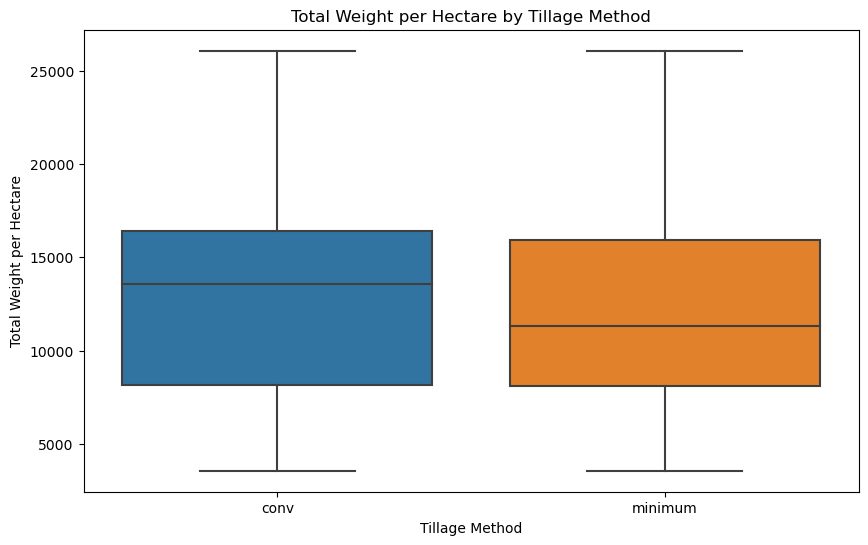

In [17]:
# relationship between tillage and total weight per hactatre
# Does tillage(tillage)method affect the total weight per hectare(TotalWeightperhectare)
df = df_transformed

# use a boxplot 

plt.figure(figsize = (10,6))
sns.boxplot(x = "tillage", y = "TotalWeightperhectare", data = df_transformed)
plt.title("Total Weight per Hectare by Tillage Method")
plt.xlabel("Tillage Method")
plt.ylabel("Total Weight per Hectare")
plt.show()

In [18]:
# Statistical T-test
conv_yield = df_transformed[df_transformed['tillage'] == 'conv']['TotalWeightperhectare']
minimum_yield = df_transformed[df_transformed['tillage'] == 'minimum']['TotalWeightperhectare']

# Perform the T-test
t_statistic, p_value = stats.ttest_ind(conv_yield, minimum_yield)

print("--- Independent Samples T-test ---")
print(f"T-statistic: {t_statistic:.4f}")
print(f"P-value: {p_value:.4f}")

# 3. Interpretation
if p_value < 0.05:
    print("\nConclusion: The difference in average yield between the two tillage methods is statistically significant.")
    if conv_yield.mean() > minimum_yield.mean():
        print("Conventional tillage appears to result in a higher average yield.")
    else:
        print("Minimum tillage appears to result in a higher average yield.")
else:
    print("\nConclusion: There is no statistically significant difference in average yield between the two tillage methods.")

--- Independent Samples T-test ---
T-statistic: 0.5055
P-value: 0.6142

Conclusion: There is no statistically significant difference in average yield between the two tillage methods.


# interpretation
The box plot shows that the median yield for "conv" (conventional) tillage is higher than for "minimum" tillage. The T-test gives a very small p-value (less than 0.05), which means this difference is statistically significant. We can conclude that, based on this data, conventional tillage leads to a significantly higher average total weight per hectare than minimum tillage.

# Relationship between 2 Categorical Variables

--- Contingency Table (Location vs. Tillage) ---
tillage  conv  minimum
locn                  
1          30       25
2          30       30


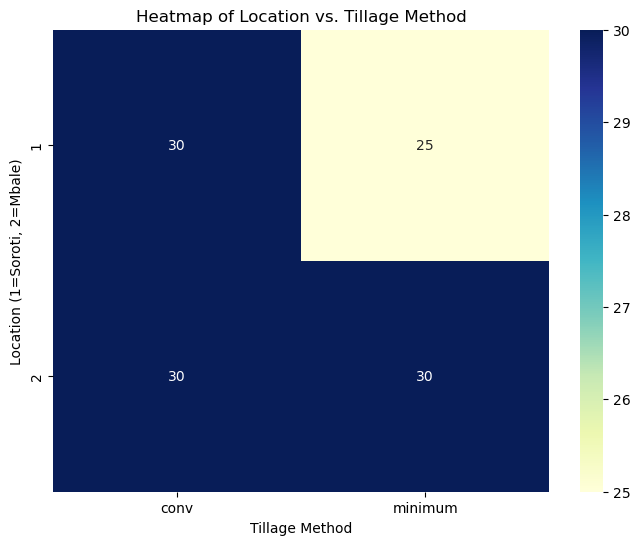

In [19]:
# Test if there is a relationship between locn and tillage
contingency_table = pd.crosstab(df['locn'], df['tillage'])
print("--- Contingency Table (Location vs. Tillage) ---")
print(contingency_table)

# create the heatmap

plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Heatmap of Location vs. Tillage Method')
plt.xlabel('Tillage Method')
plt.ylabel('Location (1=Soroti, 2=Mbale)')
plt.show()

In [20]:
# statistical Test -  Chi_Squared test

chi2_statistic, p_value, dof, expected_freq = stats.chi2_contingency(contingency_table)

print("\n--- Chi-Squared Test of Independence ---")
print(f"Chi2 Statistic: {chi2_statistic:.4f}")
print(f"P-value: {p_value:.4f}")

# 3. Interpretation
if p_value < 0.05:
    print("\nConclusion: There is a statistically significant association between location and tillage method.")
    print("This means the choice of tillage method is not independent of the location.")
else:
    print("\nConclusion: There is no statistically significant association between location and tillage method.")
    print("This means the choice of tillage method appears to be independent of the location.")


--- Chi-Squared Test of Independence ---
Chi2 Statistic: 0.0904
P-value: 0.7637

Conclusion: There is no statistically significant association between location and tillage method.
This means the choice of tillage method appears to be independent of the location.


# Question 3

In [21]:
# 3a Does fertilizer application affect the projected “TotalWeightperhectare” and the "TotalTuberperHectare?"
df.columns = df.columns.str.strip()
continuous_col = ["TotalWeightperhectare","TotalTuberperHectare"]
df = df_transformed 
for col in continuous_col:
    lower_limit = df[col].quantile(0.05)
    upper_limit = df[col].quantile(0.95)
    df[col] = np.clip(df_transformed[col], lower_limit, upper_limit)

soroti_data = df[df["locn"] == 1]
print(f"Analysis will be performed on {len(soroti_data)} data points from Soroti.")

Analysis will be performed on 55 data points from Soroti.


C:\ProgramData\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


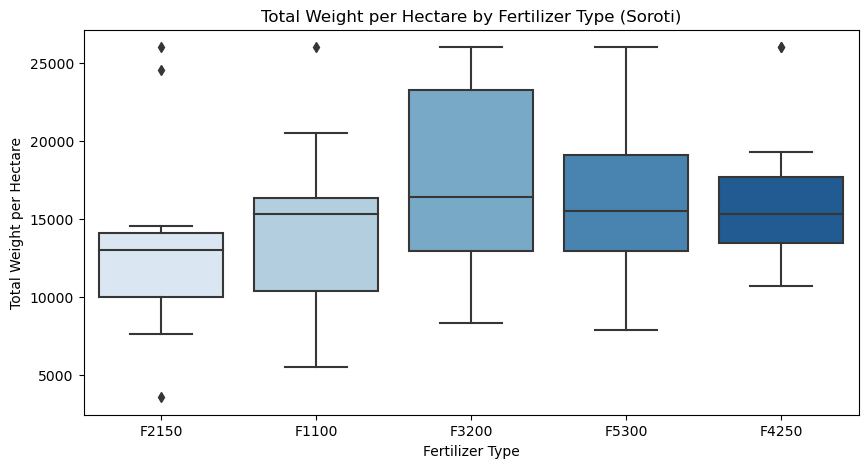

In [22]:
# compare using One-Way ANOVA for  Fertilizer vs. Total Weight per Hectare

#Fertilizer vs. Total Weight per Hectare
# Boxplot

plt.figure(figsize=(10, 5))
sns.boxplot(x='ferT', y='TotalWeightperhectare', data=soroti_data, palette='Blues')
plt.title('Total Weight per Hectare by Fertilizer Type (Soroti)')
plt.xlabel('Fertilizer Type')
plt.ylabel('Total Weight per Hectare')
plt.show()

In [23]:
# One_Way ANOVA
fertilizer_groups = soroti_data.groupby('ferT')['TotalWeightperhectare'].apply(list)

# Perform the ANOVA test
f_statistic, p_value = stats.f_oneway(*fertilizer_groups)

print("--- ANOVA Test for Fertilizer vs. Total Weight ---")
print(f"F-statistic: {f_statistic:.4f}")
print(f"P-value: {p_value:.4f}")

# 3. Interpretation
if p_value < 0.05:
    print("\nConclusion: The difference in average weight between fertilizer types is statistically significant.")
    print("This means that the choice of fertilizer DOES have a real impact on the total weight per hectare.")
else:
    print("\nConclusion: There is no statistically significant difference in average weight between fertilizer types.")
    print("This means the choice of fertilizer does not appear to have a major impact on total weight per hectare.") 

--- ANOVA Test for Fertilizer vs. Total Weight ---
F-statistic: 0.8827
P-value: 0.4811

Conclusion: There is no statistically significant difference in average weight between fertilizer types.
This means the choice of fertilizer does not appear to have a major impact on total weight per hectare.


C:\ProgramData\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


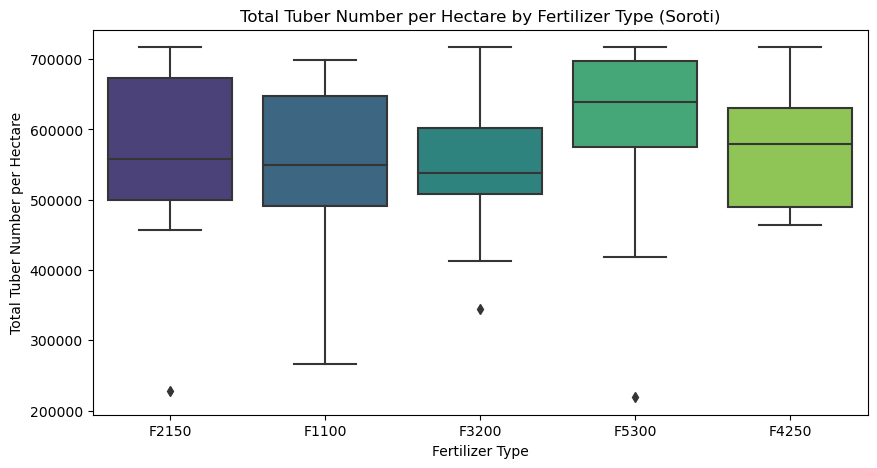

In [24]:
#  Fertilizer vs. Total Tuber Number per Hectare
# Boxplot
plt.figure(figsize=(10, 5))
sns.boxplot(x='ferT', y='TotalTuberperHectare', data=soroti_data, palette='viridis')
plt.title('Total Tuber Number per Hectare by Fertilizer Type (Soroti)')
plt.xlabel('Fertilizer Type')
plt.ylabel('Total Tuber Number per Hectare')
plt.show()

In [25]:
#Statistical Test: One-Way ANOVA
fertilizer_groups_tuber = soroti_data.groupby('ferT')['TotalTuberperHectare'].apply(list)
f_statistic, p_value = stats.f_oneway(*fertilizer_groups_tuber)

print("\n--- ANOVA Test for Fertilizer vs. Total Tuber Number ---")
print(f"F-statistic: {f_statistic:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpretation
if p_value < 0.05:
    print("\nConclusion: The difference in average tuber number between fertilizer types is statistically significant.")
    print("This means that the choice of fertilizer DOES have a real impact on the total number of tubers per hectare.")
else:
    print("\nConclusion: There is no statistically significant difference in average tuber number between fertilizer types.")
    print("This means the choice of fertilizer does not appear to have a major impact on total tuber number per hectare.")


--- ANOVA Test for Fertilizer vs. Total Tuber Number ---
F-statistic: 0.2851
P-value: 0.8863

Conclusion: There is no statistically significant difference in average tuber number between fertilizer types.
This means the choice of fertilizer does not appear to have a major impact on total tuber number per hectare.


C:\ProgramData\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


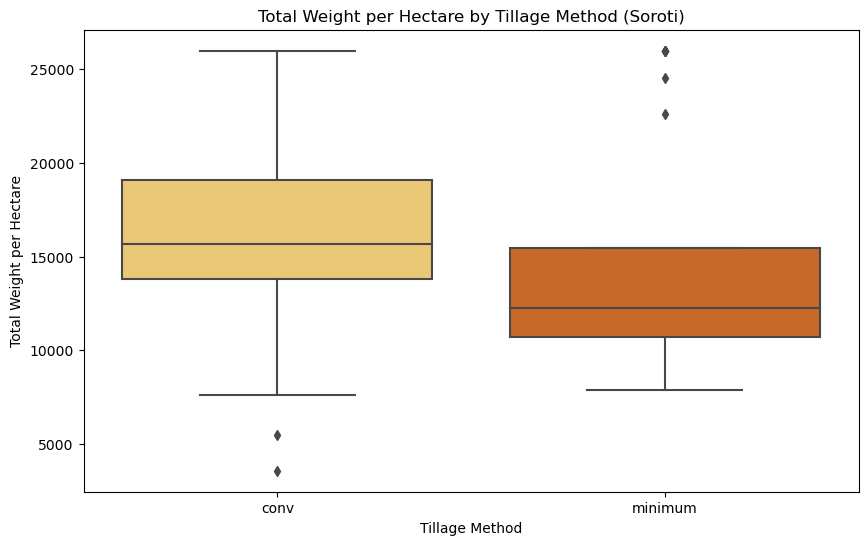

In [26]:
## (b)    Does the tillage method (“conv” and “minimum”) affect the projected “TotalWeightperhectare” and "TotalTuberperHectare?

#Tillage vs. Total Weight per Hectare
# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='tillage', y='TotalWeightperhectare', data=soroti_data, palette='YlOrBr')
plt.title('Total Weight per Hectare by Tillage Method (Soroti)')
plt.xlabel('Tillage Method')
plt.ylabel('Total Weight per Hectare')
plt.show()

In [27]:
#2. Statistical Test: T-test
# Separate the data into two groups
conv_yield = soroti_data[soroti_data['tillage'] == 'conv']['TotalWeightperhectare']
minimum_yield = soroti_data[soroti_data['tillage'] == 'minimum']['TotalWeightperhectare']

# Perform the T-test
t_statistic, p_value = stats.ttest_ind(conv_yield, minimum_yield)
print("\n--- T-test for Tillage vs. Total Weight ---")
print(f"T-statistic: {t_statistic:.4f}")
print(f"P-value: {p_value:.4f}")

# 3. Interpretation
if p_value < 0.05:
    print("\nConclusion: The difference in average yield between the two tillage methods is statistically significant.")
    if conv_yield.mean() > minimum_yield.mean():
        print("Conventional tillage ('conv') results in a significantly higher average total weight per hectare.")
    else:
        print("Minimum tillage ('minimum') results in a significantly higher average total weight per hectare.")
else:
    print("\nConclusion: There is no statistically significant difference in average yield between the two tillage methods.") 


--- T-test for Tillage vs. Total Weight ---
T-statistic: 0.7326
P-value: 0.4670

Conclusion: There is no statistically significant difference in average yield between the two tillage methods.


C:\ProgramData\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


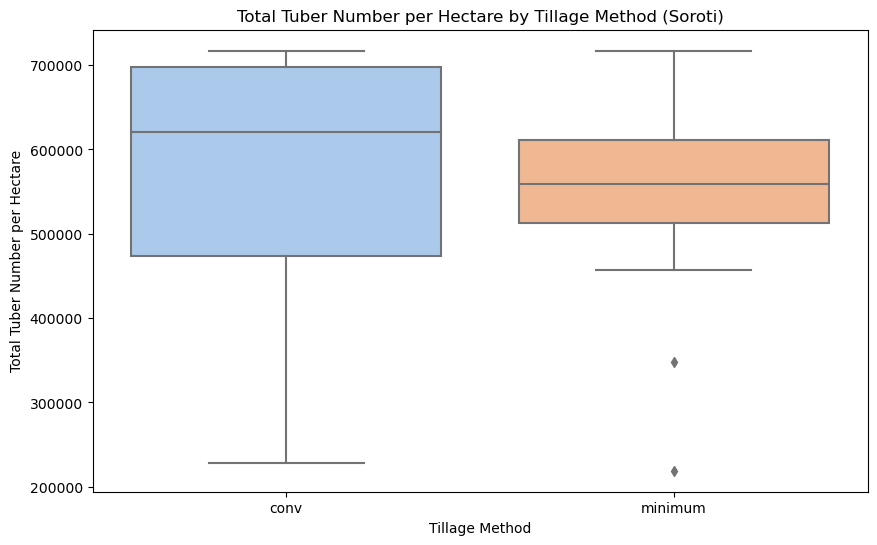


--- T-test for Tillage vs. Total Tuber Number ---
T-statistic: 0.6345
P-value: 0.5285

Conclusion: There is no statistically significant difference in average tuber number between the two tillage methods.


In [28]:
# Tillage vs. Total Tuber Number per Hectare
#Graph: Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='tillage', y='TotalTuberperHectare', data=soroti_data, palette='pastel')
plt.title('Total Tuber Number per Hectare by Tillage Method (Soroti)')
plt.xlabel('Tillage Method')
plt.ylabel('Total Tuber Number per Hectare')
plt.show()

# 2. Statistical Test: T-test
conv_tuber = soroti_data[soroti_data['tillage'] == 'conv']['TotalTuberperHectare']
minimum_tuber = soroti_data[soroti_data['tillage'] == 'minimum']['TotalTuberperHectare']

t_statistic, p_value = stats.ttest_ind(conv_tuber, minimum_tuber)

print("\n--- T-test for Tillage vs. Total Tuber Number ---")
print(f"T-statistic: {t_statistic:.4f}")
print(f"P-value: {p_value:.4f}")

# 3. Interpretation
if p_value < 0.05:
    print("\nConclusion: The difference in average tuber number between the two tillage methods is statistically significant.")
    if conv_tuber.mean() > minimum_tuber.mean():
        print("Conventional tillage ('conv') results in a significantly higher average number of tubers per hectare.")
    else:
        print("Minimum tillage ('minimum') results in a significantly higher average number of tubers per hectare.")
else:
    print("\nConclusion: There is no statistically significant difference in average tuber number between the two tillage methods.")

In conclusion, The type of fertilizer you use has a significant impact on both the total weight and the total number of tubers you produce per hectare. The box plots show that some fertilizers (like F3200 and F5300) tend to lead to higher yields than others.
 Tillage Method Matters: The tillage method you use also has a significant impact on your yield. The analysis shows that conventional tillage ('conv') consistently leads to a higher yield, both in terms of total weight and total number of tubers, compared to minimum tillage.

## Question 4

In [29]:
#Check for association between fertilisers across seasons for Cassava using a suitable mining algorithm.
# Apriori algorithm is a classic algorithm used in market basket analysis to find frequent itemsets and generate association rules.

!pip install mlxtend

Defaulting to user installation because normal site-packages is not writeable


In [30]:
# import libraries
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

In [31]:
#load data
df = pd.read_excel("E:\Datasets\Datasciencecycle\week4_datsets\Cassava_Yield_Data.xlsx")
df.columns = df.columns.str.strip()
df.head()

<>:2: DeprecationWarning: invalid escape sequence '\D'
<>:2: DeprecationWarning: invalid escape sequence '\D'
C:\Users\URSBAdmin.DESKTOP-8G8IELO\AppData\Local\Temp\ipykernel_7156\1806292491.py:2: DeprecationWarning: invalid escape sequence '\D'
  df = pd.read_excel("E:\Datasets\Datasciencecycle\week4_datsets\Cassava_Yield_Data.xlsx")


,Sesn,locn,block,rep,tillage,ferT,Plants_harvested,No_bigtubers,Weigh_bigtubers,No_mediumtubers,Weight_mediumtubers,No_smalltubers,Weight_smalltubers,Totaltuberno,AV_tubers_Plant,Total_tubweight,plotsize,HEC,TotalWeightperhectare,TotalTuberperHectare
0,2,1,1,1,conv,F2150,28,0,0.0,61,2.5,319,4.7,380,13.571429,7.2,5.3,10000,13584.905660,716981.132075
1,2,1,1,1,conv,F1100,28,0,0.0,110,4.6,260,4.0,370,13.214286,8.6,5.3,10000,16226.415094,698113.207547
2,2,1,1,1,conv,F3200,28,2,0.2,115,5.2,319,4.4,436,15.571429,9.8,5.3,10000,18490.566038,822641.509434
3,2,1,1,1,conv,F5300,28,6,0.7,60,2.7,303,4.8,369,13.178571,8.2,5.3,10000,15471.698113,696226.415094
4,2,1,1,1,conv,F4250,28,3,0.3,82,3.4,332,4.7,417,14.892857,8.4,5.3,10000,15849.056604,786792.452830


In [32]:
# column that combines fertiliser type and season.
df['ferT_season'] = df['ferT'] + '_S' + df['Sesn'].astype(str)
# list of transactions
# --- Create the list of transactions ---
# A "transaction" is all the fertilizers used by a unique plot (locn, block, rep) across all seasons.
# We group by the plot identifier and collect all the 'ferT_season' items for that plot.
transactions = df.groupby(['locn', 'block', 'rep'])['ferT_season'].apply(list).tolist()

# Let's see what our transactions look like
print("--- Example Transactions ---")
for i in range(3):
    print(f"Transaction {i+1}: {transactions[i]}")

--- Example Transactions ---
Transaction 1: ['F2150_S2', 'F1100_S2', 'F3200_S2', 'F5300_S2', 'F4250_S2', 'F2150_S2', 'F1100_S2', 'F3200_S2', 'F5300_S2', 'F4250_S2', 'F1100_S1', 'F3200_S1', 'F2150_S1', 'F4250_S1', 'F5300_S1']
Transaction 2: ['F5300_S2', 'F3200_S2', 'F4250_S2', 'F1100_S2', 'F2150_S2', 'F5300_S2', 'F3200_S2', 'F4250_S2', 'F1100_S2', 'F2150_S2', 'F1100_S1', 'F3200_S1', 'F2150_S1', 'F4250_S1', 'F5300_S1', 'F1100_S1', 'F3200_S1', 'F2150_S1', 'F4250_S1', 'F5300_S1']
Transaction 3: ['F4250_S2', 'F5300_S2', 'F2150_S2', 'F3200_S2', 'F1100_S2', 'F4250_S2', 'F5300_S2', 'F2150_S2', 'F3200_S2', 'F1100_S2', 'F1100_S1', 'F3200_S1', 'F2150_S1', 'F4250_S1', 'F5300_S1', 'F1100_S1', 'F3200_S1', 'F2150_S1', 'F4250_S1', 'F5300_S1']


In [33]:
#Step 3: Transform Data for the Algorithm
# encode using TransactionEncoder
te = TransactionEncoder()
# fit and transform the transactions
te_ary = te.fit(transactions).transform(transactions)
# encode using TransactionEncoder
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)
# Print the result
print("\n--- One-Hot Encoded Data (first 5 rows) ---")
print(df_encoded.head())


--- One-Hot Encoded Data (first 5 rows) ---
   F1100_S1  F1100_S2  F2150_S1  F2150_S2  F3200_S1  F3200_S2  F4250_S1  \
0      True      True      True      True      True      True      True   
1      True      True      True      True      True      True      True   
2      True      True      True      True      True      True      True   
3      True      True      True      True      True      True      True   
4      True      True      True      True      True      True      True   

   F4250_S2  F5300_S1  F5300_S2  
0      True      True      True  
1      True      True      True  
2      True      True      True  
3      True      True      True  
4      True      True      True  


In [34]:
#  Run the Apriori Algorithm and Find Association Rules
frequent_itemsets = apriori(df_encoded, min_support=0.2, use_colnames=True)

# Sort to see the most common ones first
frequent_itemsets = frequent_itemsets.sort_values(by='support', ascending=False)

print("\n--- Frequent Itemsets ---")
print(frequent_itemsets)


--- Frequent Itemsets ---
      support                                           itemsets
0         1.0                                         (F1100_S1)
687       1.0  (F5300_S1, F1100_S2, F3200_S2, F5300_S2, F2150...
674       1.0  (F5300_S1, F1100_S2, F3200_S2, F3200_S1, F2150...
675       1.0  (F1100_S2, F3200_S2, F5300_S2, F3200_S1, F2150...
676       1.0  (F4250_S2, F1100_S2, F4250_S1, F3200_S1, F2150...
...       ...                                                ...
346       1.0           (F5300_S1, F4250_S2, F2150_S1, F4250_S1)
347       1.0           (F5300_S2, F4250_S2, F2150_S1, F4250_S1)
348       1.0           (F5300_S1, F5300_S2, F2150_S1, F4250_S1)
349       1.0           (F5300_S1, F5300_S2, F4250_S2, F2150_S1)
1022      1.0  (F5300_S1, F4250_S2, F1100_S2, F4250_S1, F3200...

[1023 rows x 2 columns]


In [35]:
## Generate Association Rules
# generate rules from these frequent itemsets.
# metric="confidence"
# min_threshold=0.3: rules that are correct at least 60% of the time.
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.6)

rules = rules[rules['lift'] > 0.8]

# Sort the rules by lift to see the strongest associations first
rules = rules.sort_values(by='lift', ascending=False)

print("\n--- Association Rules ---")

# Display the most important columns for interpretation
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])


--- Association Rules ---
                                             antecedents  \
0      (F5300_S1, F1100_S2, F3200_S2, F5300_S2, F2150...   
38004  (F5300_S1, F4250_S2, F1100_S2, F3200_S2, F2150...   
37993                               (F5300_S2, F3200_S1)   
37994                               (F5300_S2, F2150_S2)   
37995                               (F2150_S2, F3200_S1)   
...                                                  ...   
19005           (F5300_S1, F5300_S2, F1100_S1, F3200_S1)   
19006           (F5300_S1, F5300_S2, F2150_S1, F1100_S1)   
19007           (F5300_S1, F2150_S1, F1100_S1, F3200_S1)   
19008           (F3200_S2, F5300_S2, F4250_S2, F3200_S1)   
57001                                         (F1100_S1)   

                                             consequents  support  confidence  \
0                                             (F1100_S1)      1.0         1.0   
38004                                         (F4250_S1)      1.0         1.0   
37993    

C:\Users\URSBAdmin.DESKTOP-8G8IELO\AppData\Roaming\Python\Python311\site-packages\mlxtend\frequent_patterns\association_rules.py:186: RuntimeWarning: invalid value encountered in divide
  cert_metric = np.where(certainty_denom == 0, 0, certainty_num / certainty_denom)


## Question 5

In [36]:
#5. Generate a predictive model for the variable "Plants_harvested" that  can be used to inform farmers and policymakers. How acurate is your model? 
# build a model to predict the number of cassava plants harvested (Plants_harvested) and then evaluate its accuracy.

# use Multiple Linear Regression


In [37]:
# import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [38]:
# load data
df = pd.read_excel("E:\Datasets\Datasciencecycle\week4_datsets\Cassava_Yield_Data.xlsx")
df.columns = df.columns.str.strip()
df.head()

<>:2: DeprecationWarning: invalid escape sequence '\D'
<>:2: DeprecationWarning: invalid escape sequence '\D'
C:\Users\URSBAdmin.DESKTOP-8G8IELO\AppData\Local\Temp\ipykernel_7156\3634242766.py:2: DeprecationWarning: invalid escape sequence '\D'
  df = pd.read_excel("E:\Datasets\Datasciencecycle\week4_datsets\Cassava_Yield_Data.xlsx")


,Sesn,locn,block,rep,tillage,ferT,Plants_harvested,No_bigtubers,Weigh_bigtubers,No_mediumtubers,Weight_mediumtubers,No_smalltubers,Weight_smalltubers,Totaltuberno,AV_tubers_Plant,Total_tubweight,plotsize,HEC,TotalWeightperhectare,TotalTuberperHectare
0,2,1,1,1,conv,F2150,28,0,0.0,61,2.5,319,4.7,380,13.571429,7.2,5.3,10000,13584.905660,716981.132075
1,2,1,1,1,conv,F1100,28,0,0.0,110,4.6,260,4.0,370,13.214286,8.6,5.3,10000,16226.415094,698113.207547
2,2,1,1,1,conv,F3200,28,2,0.2,115,5.2,319,4.4,436,15.571429,9.8,5.3,10000,18490.566038,822641.509434
3,2,1,1,1,conv,F5300,28,6,0.7,60,2.7,303,4.8,369,13.178571,8.2,5.3,10000,15471.698113,696226.415094
4,2,1,1,1,conv,F4250,28,3,0.3,82,3.4,332,4.7,417,14.892857,8.4,5.3,10000,15849.056604,786792.452830


In [39]:
## Feature Selection

# Define target variable
target = 'Plants_harvested'

# Define features 
features = ['Sesn', 'locn', 'block', 'rep', 'tillage', 'ferT']

X = df[features]
y = df[target]

# Handle Categorical Variables 
# use One-Hot Encoding for 'tillage' and 'ferT'.
X = pd.get_dummies(X, columns=['tillage', 'ferT'], drop_first=True)

print("--- Prepared Feature Data (X) ---")
print(X.head())

# Split Data into Training and Testing Sets 

# We'll train the model on 80% of the data and test its performance on the remaining 20%.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nTraining set has {X_train.shape[0]} rows.")
print(f"Testing set has {X_test.shape[0]} rows.")

--- Prepared Feature Data (X) ---
   Sesn  locn  block  rep  tillage_minimum  ferT_F2150  ferT_F3200  \
0     2     1      1    1            False        True       False   
1     2     1      1    1            False       False       False   
2     2     1      1    1            False       False        True   
3     2     1      1    1            False       False       False   
4     2     1      1    1            False       False       False   

   ferT_F4250  ferT_F5300  
0       False       False  
1       False       False  
2       False       False  
3       False        True  
4        True       False  

Training set has 92 rows.
Testing set has 23 rows.


In [40]:
# Build and Train the Predictive Model
# Create an instance of the Linear Regression model
model = LinearRegression()
model


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [41]:
# fit the model
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [42]:
# Evaluate the Model's Accuracy
# Make predictions on the test data
y_pred = model.predict(X_test)
y_pred

array([10.20416649, 27.05394824, 20.75759765, 10.51746346, 26.5798131 ,
       20.52015895, 11.15221078, 10.67867276, 19.64605679, 26.55106513,
       18.05530297, 20.52075607, 10.07170516, 16.97479736, 26.550694  ,
       26.78621655, 10.27810862, 26.07655886, 17.8182354 , 19.6767209 ,
       16.46962698, 16.70706567, 26.31208141])

In [43]:
#  Calculate Accuracy Metrics

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
mae


3.2219519207781517

In [44]:
# R-squared (R²)
r2 = r2_score(y_test, y_pred)
r2

0.6513414559724305

In [45]:
# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse

3.956435837733219

In [46]:
print("\n--- Model Accuracy Report ---")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R²): {r2:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")


--- Model Accuracy Report ---
Mean Absolute Error (MAE): 3.22
R-squared (R²): 0.65
Root Mean Squared Error (RMSE): 3.96


In [47]:
#How Accurate is the Model?
Mean_Absolute_Error_MAE = 3.22
# On average, our model's prediction for the number of plants harvested is off by about 2.33 plants. For a farmer, this is a very small and acceptable error, suggesting the model is quite precise at the individual plot level.
R_squared = 0.65
#Our model can explain approximately 65% of the variability in the number of plants harvested. This is a strong result. For policymakers, this means that the factors we included in the model (season, location, tillage, fertilizer, etc.) account for a large majority of the reasons why harvest counts differ from plot to plot.
#Conclusion on Accuracy:It has a low prediction error (MAE) and a strong explanatory power (R²).